In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import h5py
import joblib
drive.mount('/content/drive')
file_path="/content/drive/MyDrive/dataset_ts_light_version.hdf5"


Mounted at /content/drive


### Preprocessing

In [3]:
with h5py.File(file_path, 'r') as f:
  for key in f.keys():
    print(f"{key}: shape={f[key].shape}")

  X_train= f['x_train'][:]
  y_train= f['y_train'][:]

  X_val= f['x_validation'][:]
  y_val= f['y_validation'][:]

  X_test= f['x_test'][:]
  y_test= f['y_test'][:]

x_test: shape=(7766, 48, 48, 3)
x_train: shape=(90601, 48, 48, 3)
x_validation: shape=(31063, 48, 48, 3)
y_test: shape=(7766,)
y_train: shape=(90601,)
y_validation: shape=(31063,)


In [4]:
X = X_train.reshape(X_train.shape[0], -1)
del X_train
means = X.mean(axis=1, keepdims=True)
stds = X.std(axis=1, keepdims=True) + 1e-8
X_standardized = (X-means)/stds
X_standardized[:5]
del X
del means
del stds
# deleting numpy arrays to save RAM

In [5]:
X_standardized.shape

(90601, 6912)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model_new = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)
#10 iter - 0.7841874839041978 accuracy
#20 iter - 0.912052536698429 accuracy
#30 iter - 0.93638938964718 accuracy
#40 iter - 0.9500386299253155 accuracy
#100 iter - 0.9658768993046614 accuracy

# !Warning! Only run the following cell if for some reason you do not have LogisticRegression.pkl

In [7]:
#model_new.fit(X_standardized, y_train)
#joblib.dump(model_new, 'LogisticRegression.pkl')
# be careful, this reaches 9.5 GB ram used
# save the model so you can run without retraining
#del X_standardized

In [8]:
X = X_test.reshape(X_test.shape[0], -1)
del X_test
means = X.mean(axis=1, keepdims=True)
stds = X.std(axis=1, keepdims=True) + 1e-8
X_test_standardized = (X-means)/stds
X_test_standardized[:5]
del X
del means
del stds
# deleting numpy arrays to save RAM

In [9]:
model_new = joblib.load('LogisticRegression.pkl')
y_test_predict = model_new.predict(X_test_standardized)
accuracy = accuracy_score(y_test, y_test_predict)
print(accuracy)

0.9658768993046614


In [10]:
class_report = classification_report(y_test, y_test_predict)
print("Classification Report with Additional Features:")
print(class_report)

Classification Report with Additional Features:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       177
           1       0.98      0.94      0.96       193
           2       0.97      0.93      0.95       195
           3       0.96      0.94      0.95       159
           4       0.97      0.96      0.97       180
           5       0.92      0.91      0.91       170
           6       0.98      0.98      0.98       189
           7       0.96      0.94      0.95       189
           8       0.92      0.95      0.94       213
           9       0.97      0.96      0.97       168
          10       0.96      0.98      0.97       177
          11       0.96      0.93      0.95       184
          12       0.98      0.98      0.98       193
          13       0.99      0.99      0.99       174
          14       0.98      0.98      0.98       185
          15       0.97      0.99      0.98       194
          16       0.98      0.99

Let's visualize how well our model performs on each type of traffic sign.

In [11]:
from sklearn.metrics import f1_score
def myFunc(e):
  return e[1]
# 1. Find sign types with lowest & highest f1 scores
# 2. Display images for the traffic signs that have the best & worst f1 scores
f1_scores = f1_score(y_test, y_test_predict, average=None)
f1_scores = list(enumerate(f1_scores))
f1_scores.sort(key=myFunc)
print(f1_scores)


[(31, np.float64(0.9116809116809117)), (5, np.float64(0.9144542772861357)), (20, np.float64(0.9190751445086706)), (18, np.float64(0.9267015706806283)), (25, np.float64(0.9287598944591029)), (30, np.float64(0.9295774647887324)), (8, np.float64(0.9376443418013857)), (11, np.float64(0.945054945054945)), (7, np.float64(0.9493333333333334)), (3, np.float64(0.9493670886075949)), (23, np.float64(0.9515669515669516)), (2, np.float64(0.9528795811518325)), (24, np.float64(0.9561200923787528)), (26, np.float64(0.9562841530054644)), (29, np.float64(0.9597701149425287)), (1, np.float64(0.9604221635883905)), (19, np.float64(0.9641873278236914)), (4, np.float64(0.9664804469273743)), (10, np.float64(0.9664804469273743)), (9, np.float64(0.9671641791044776)), (27, np.float64(0.9693593314763231)), (41, np.float64(0.9702380952380952)), (21, np.float64(0.9712793733681462)), (17, np.float64(0.9719626168224299)), (28, np.float64(0.9752650176678446)), (35, np.float64(0.978021978021978)), (32, np.float64(0.978

In [12]:
with h5py.File(file_path, 'r') as f:
  X_test = f['x_test'][:]

In [23]:
def show_images(label, count, predicted):
  if(predicted):
    selected_images = X_test[y_test_predict[:] == label][:count]
  else:
    selected_images = X_test[y_test[:] == label][:count]

  fig, axes = plt.subplots(1, count, figsize=(20, 20))

  axes = axes.flatten()

  for i, img in enumerate(selected_images):
    axes[i].imshow(img.astype(np.uint8))
    axes[i].axis('off')


  for j in range(i + 1, len(axes)):
    axes[j].axis('off')

  plt.tight_layout()
  plt.show()

Id: 31, f1-score: 0.9116809116809117


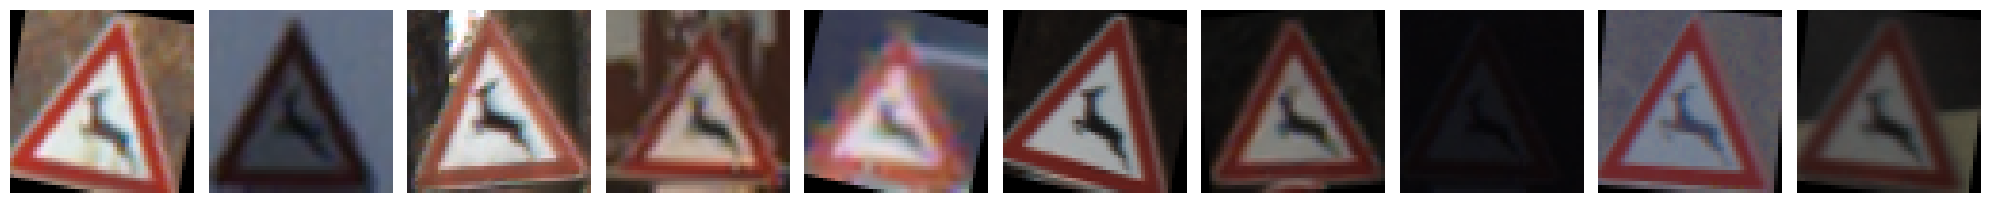

Id: 5, f1-score: 0.9144542772861357


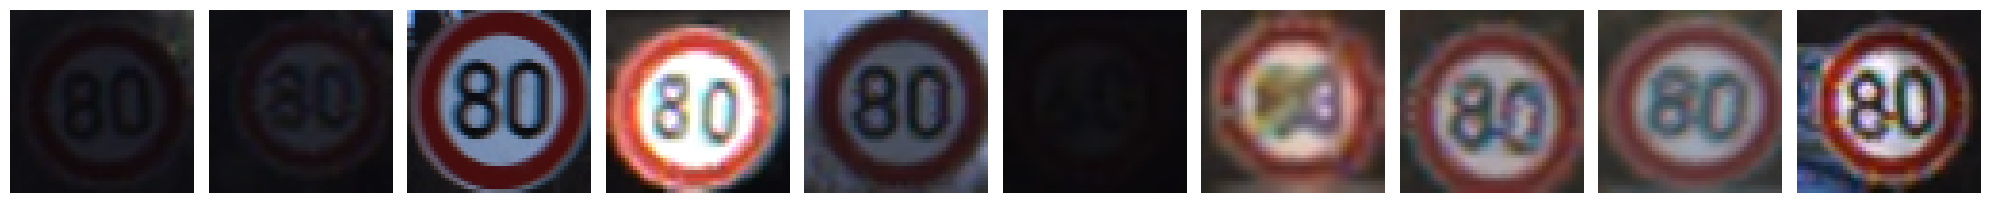

Id: 20, f1-score: 0.9190751445086706


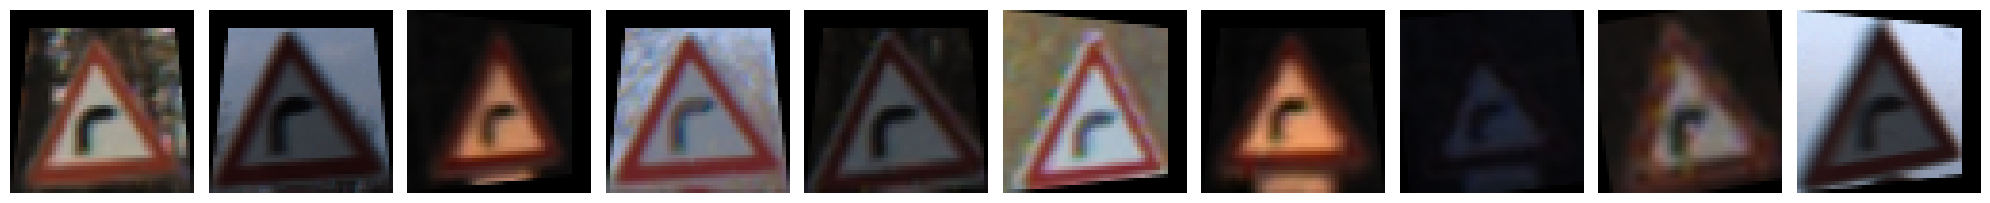

Id: 18, f1-score: 0.9267015706806283


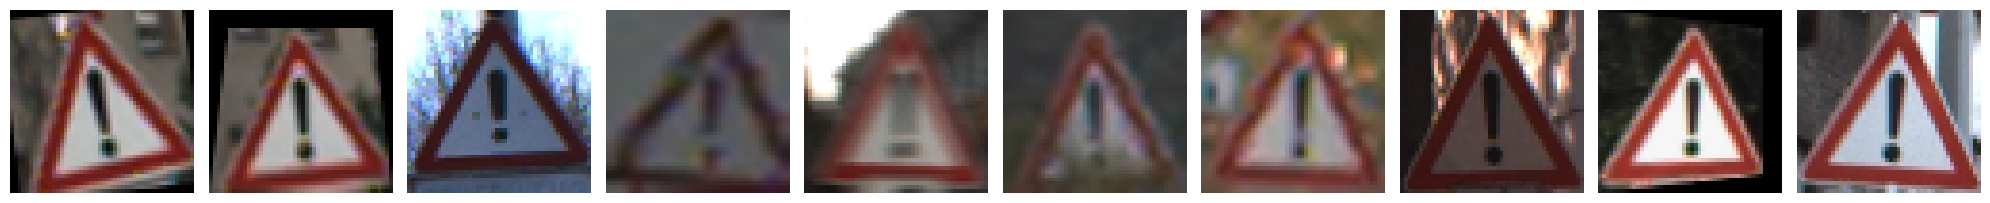

Id: 25, f1-score: 0.9287598944591029


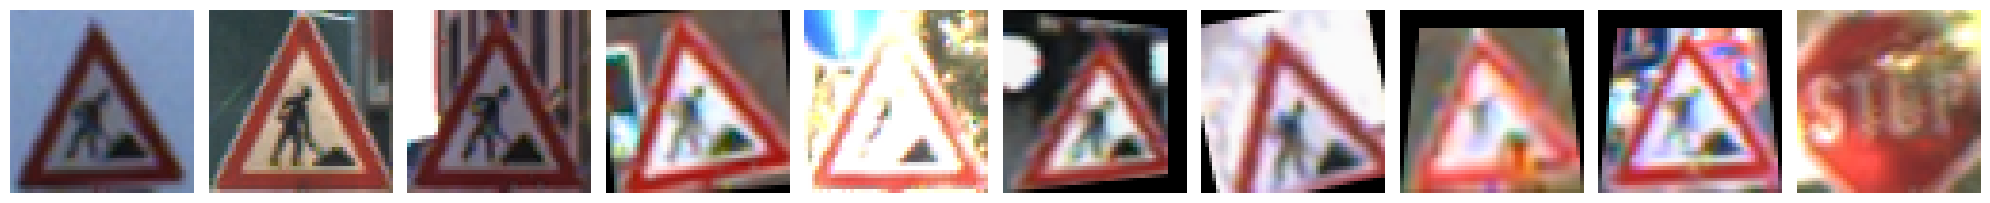

Id: 30, f1-score: 0.9295774647887324


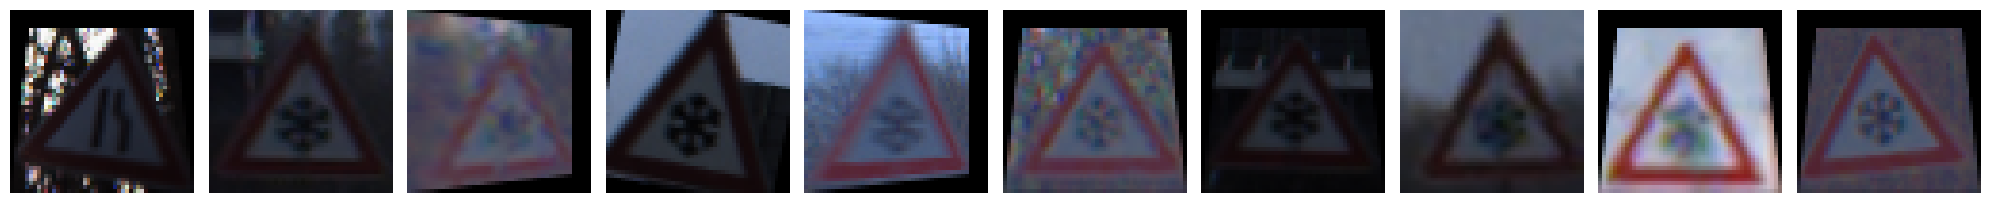

Id: 8, f1-score: 0.9376443418013857


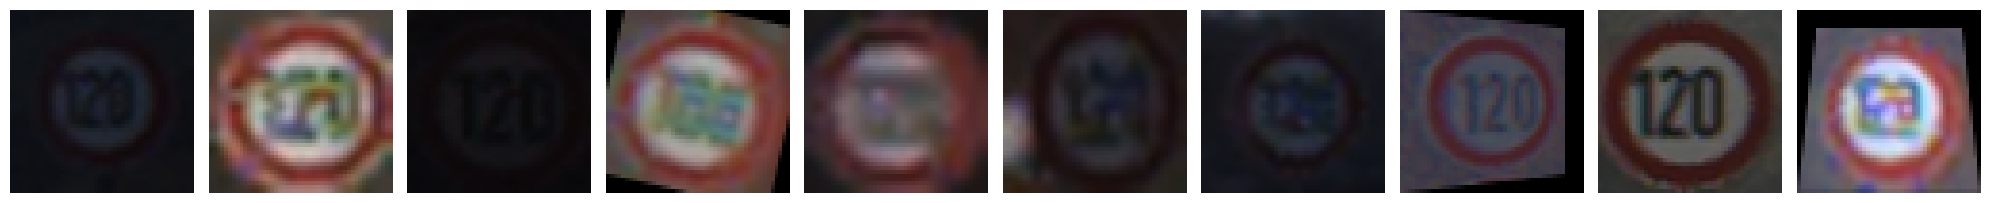

Id: 11, f1-score: 0.945054945054945


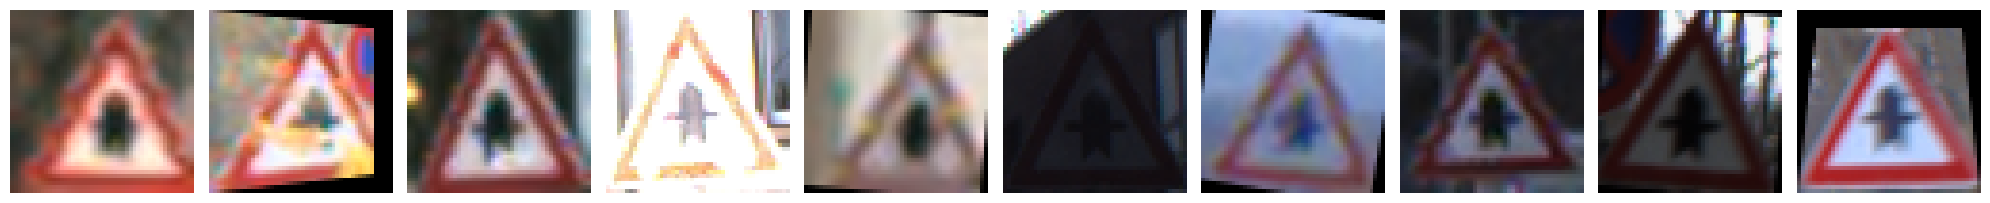

Id: 7, f1-score: 0.9493333333333334


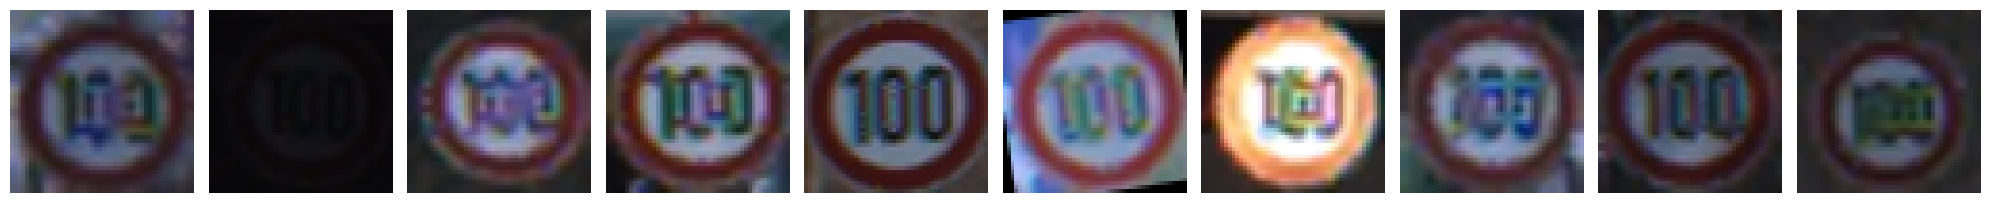

Id: 3, f1-score: 0.9493670886075949


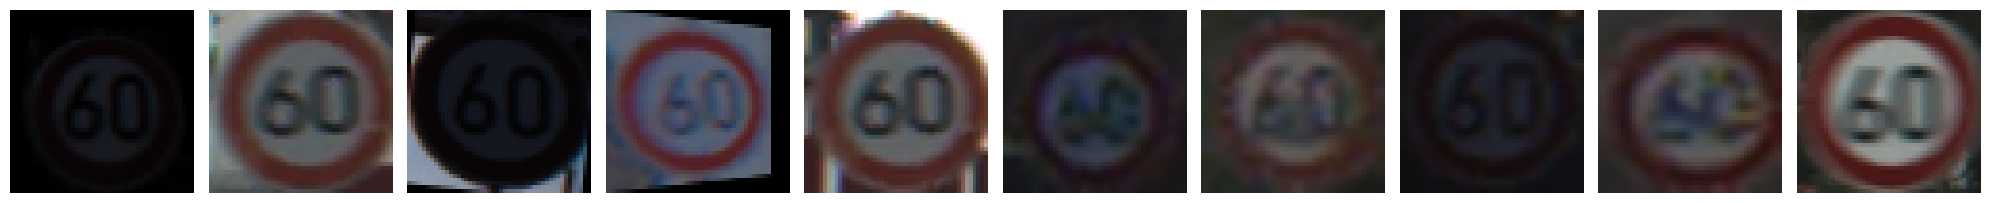

Id: 23, f1-score: 0.9515669515669516


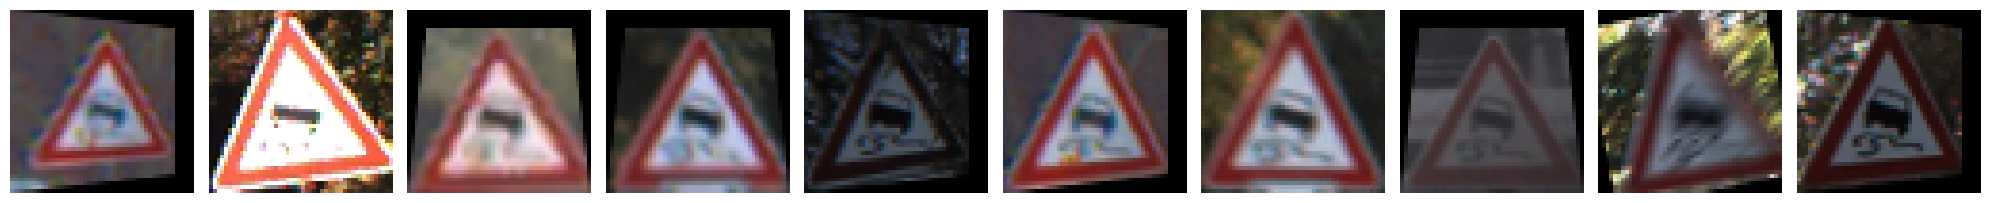

Id: 2, f1-score: 0.9528795811518325


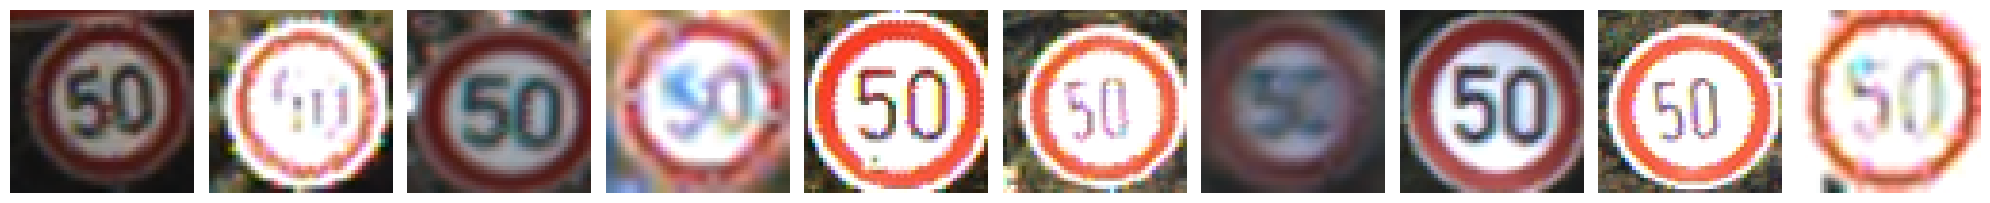

Id: 24, f1-score: 0.9561200923787528


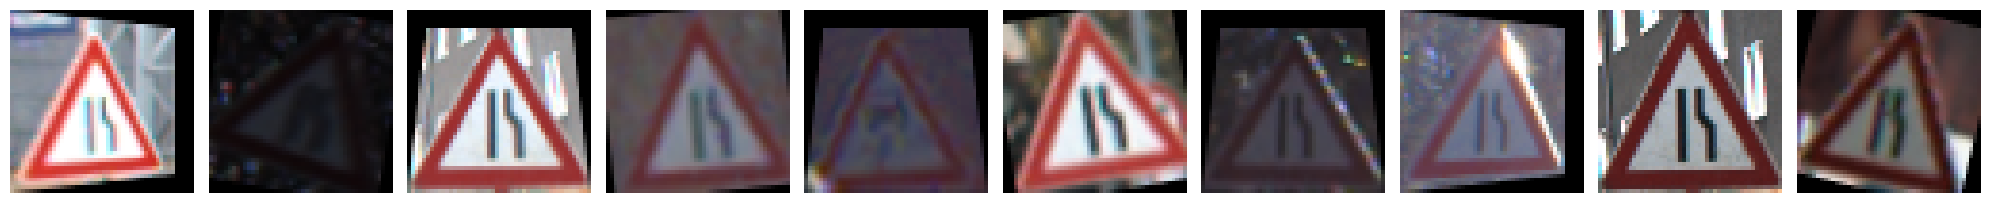

Id: 26, f1-score: 0.9562841530054644


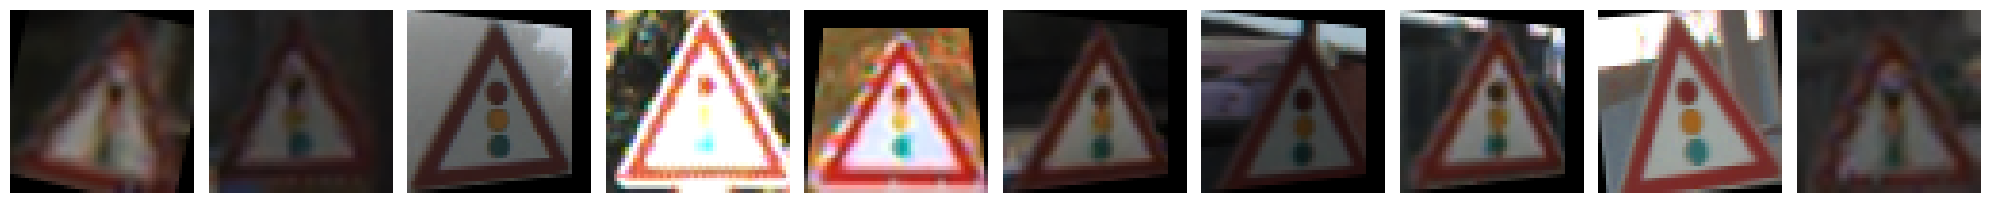

Id: 29, f1-score: 0.9597701149425287


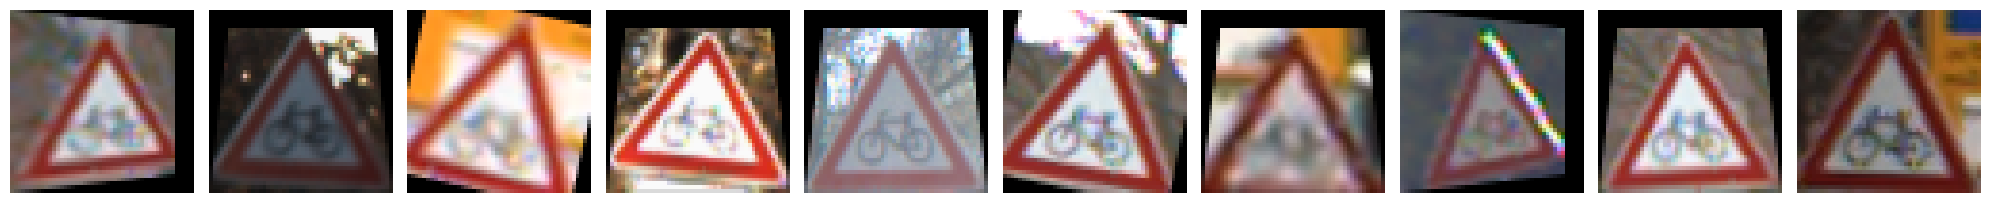

Id: 1, f1-score: 0.9604221635883905


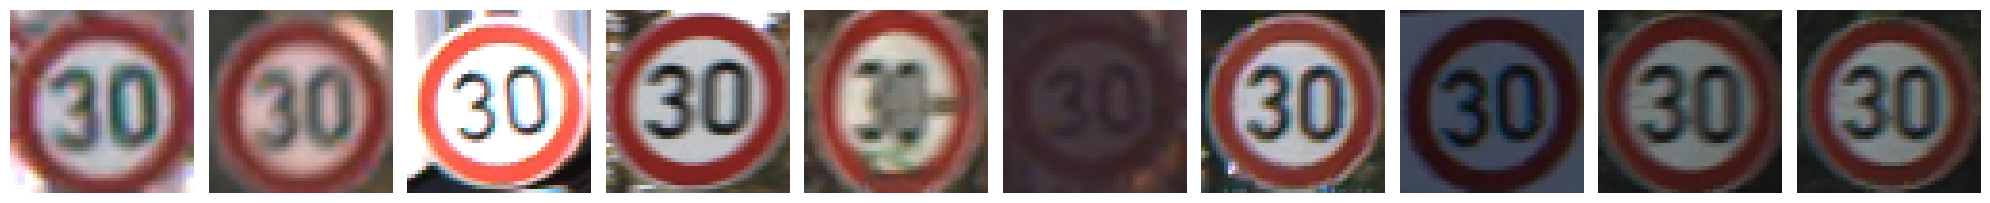

Id: 19, f1-score: 0.9641873278236914


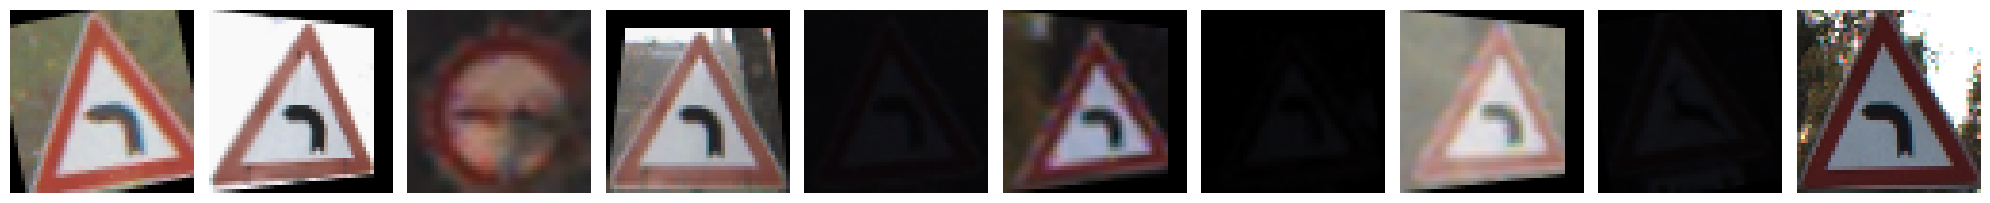

Id: 4, f1-score: 0.9664804469273743


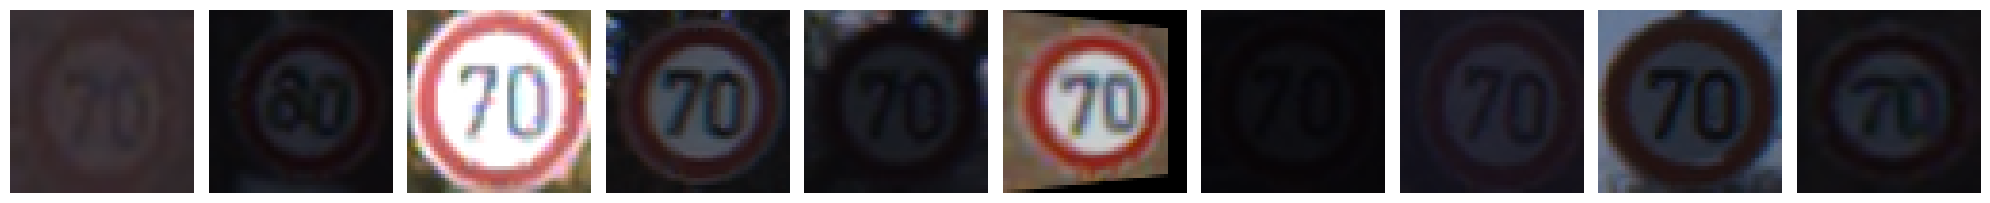

Id: 10, f1-score: 0.9664804469273743


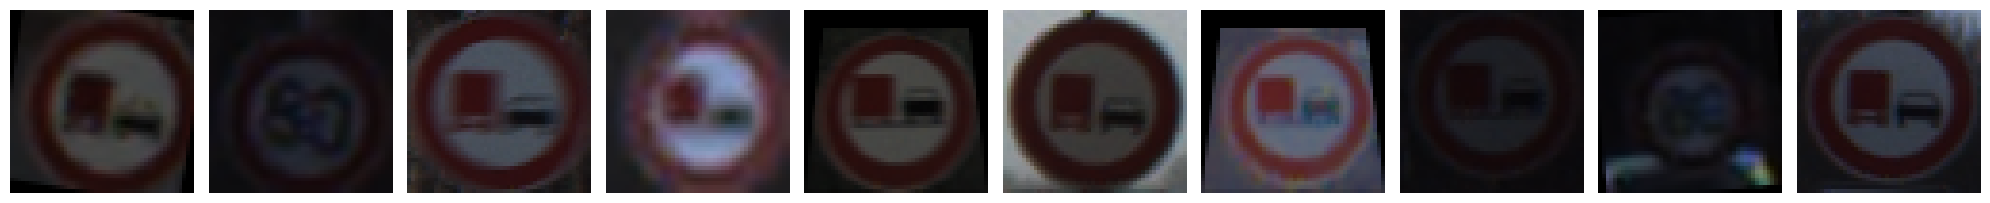

Id: 9, f1-score: 0.9671641791044776


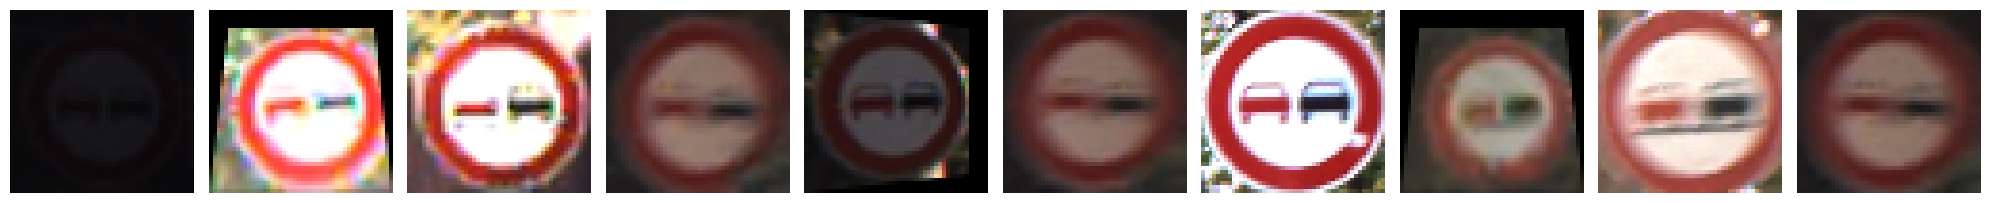

Id: 27, f1-score: 0.9693593314763231


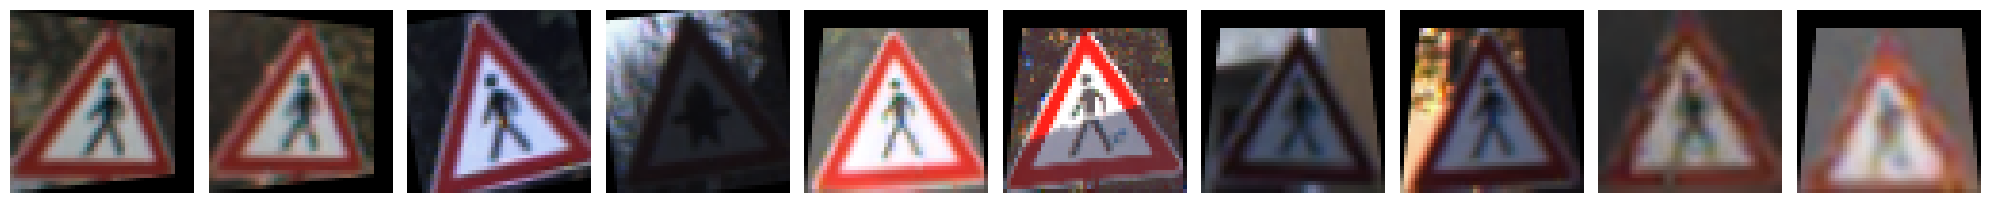

Id: 41, f1-score: 0.9702380952380952


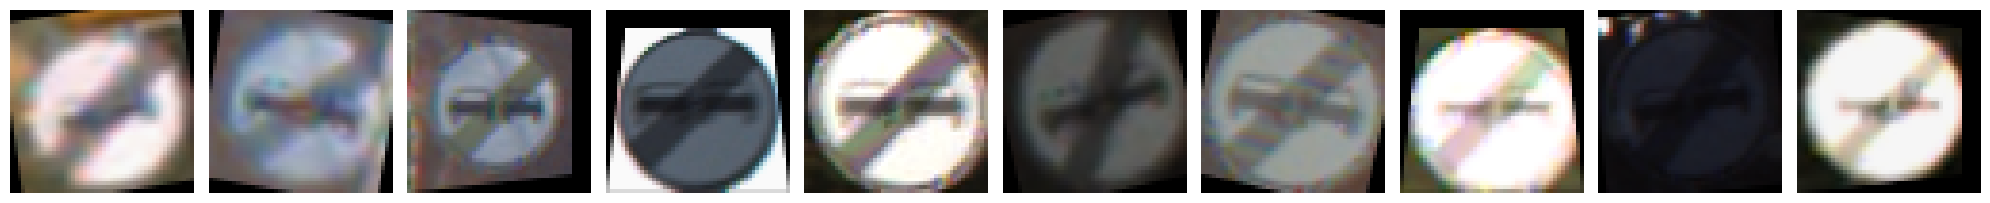

Id: 21, f1-score: 0.9712793733681462


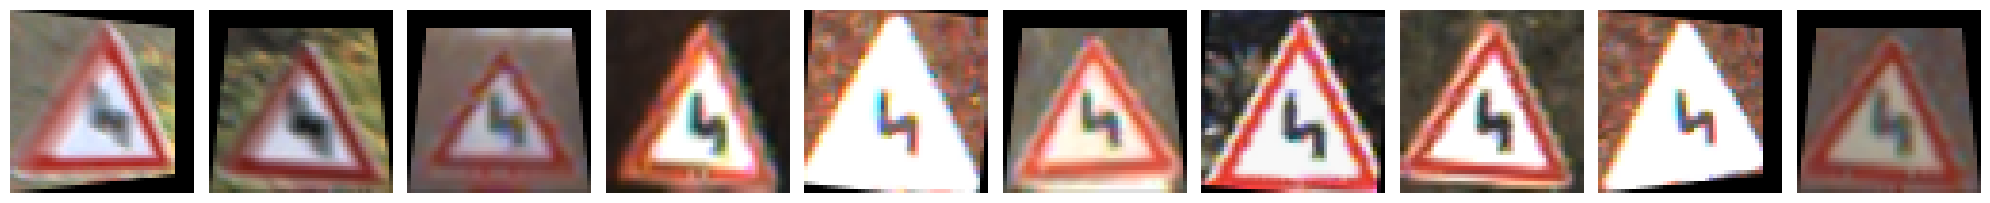

Id: 17, f1-score: 0.9719626168224299


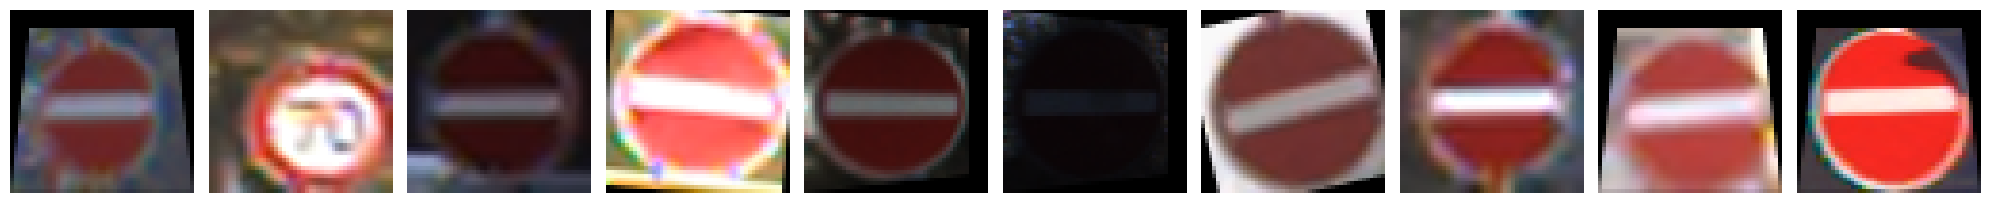

Id: 28, f1-score: 0.9752650176678446


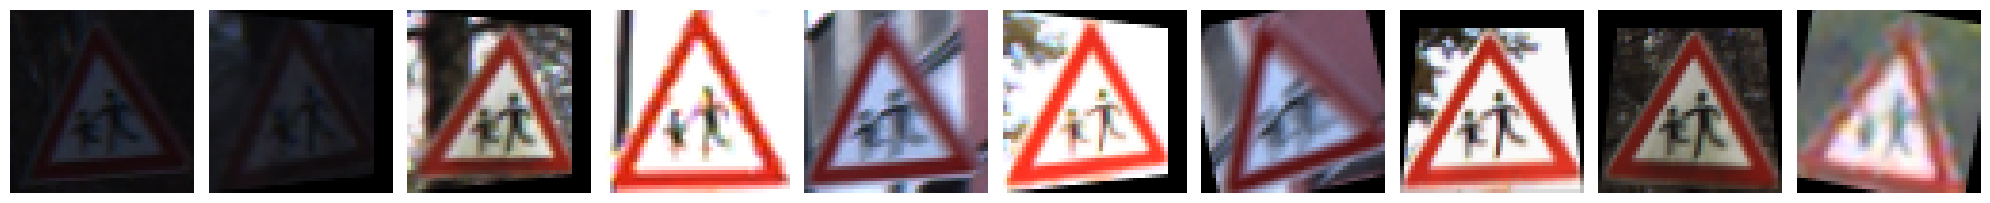

Id: 35, f1-score: 0.978021978021978


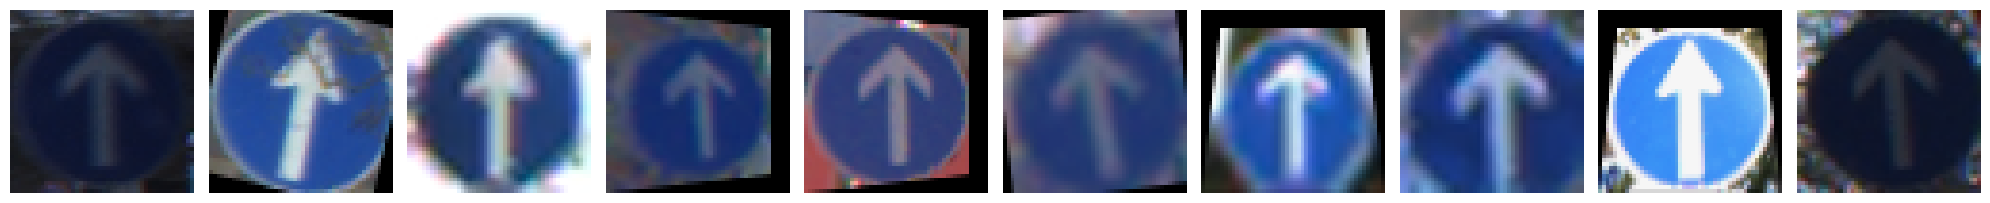

Id: 32, f1-score: 0.9788359788359788


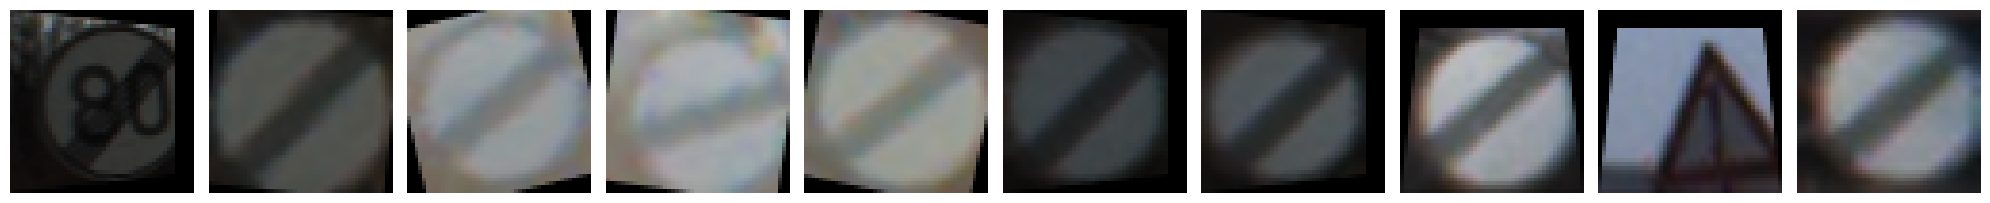

Id: 12, f1-score: 0.9792746113989638


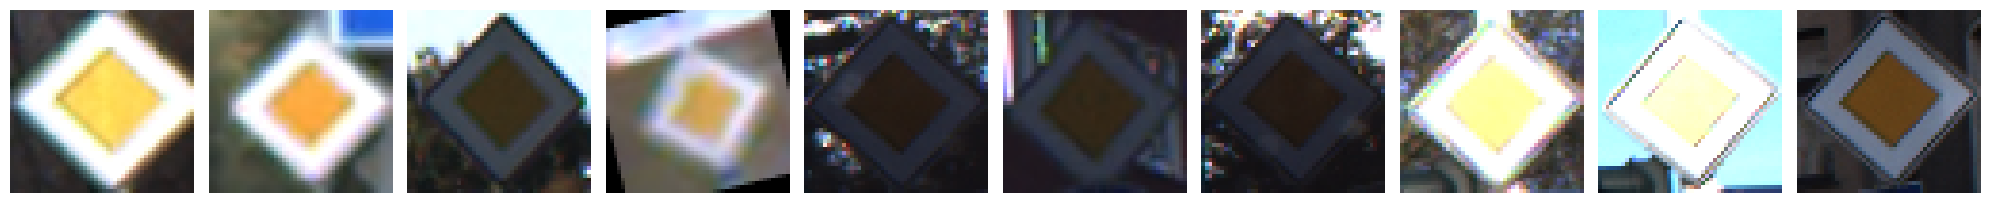

Id: 15, f1-score: 0.9795918367346939


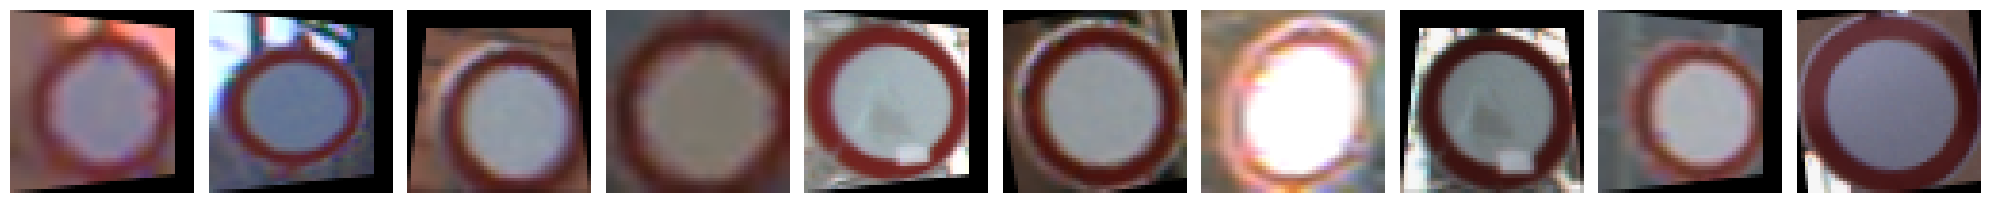

Id: 14, f1-score: 0.9811320754716981


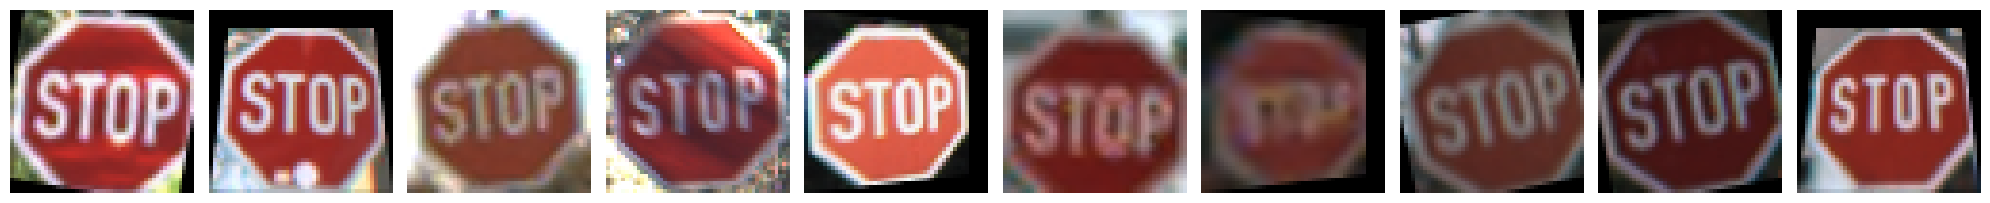

Id: 22, f1-score: 0.9833333333333333


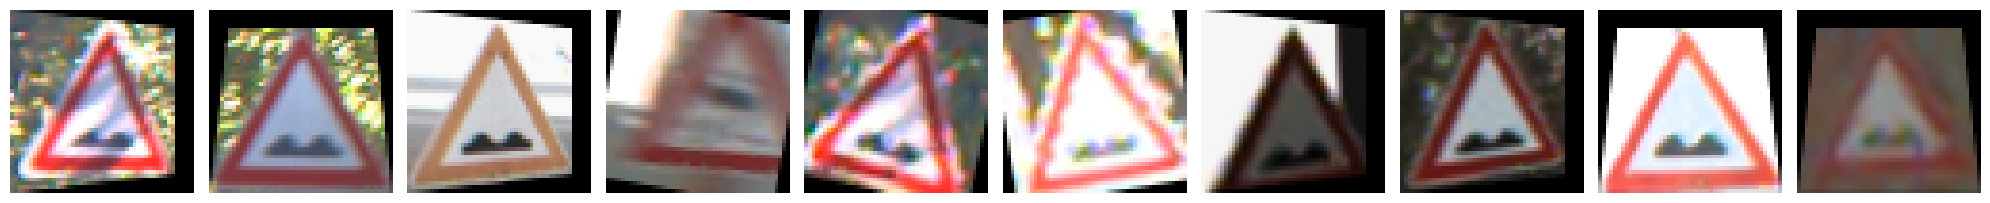

Id: 6, f1-score: 0.9841269841269841


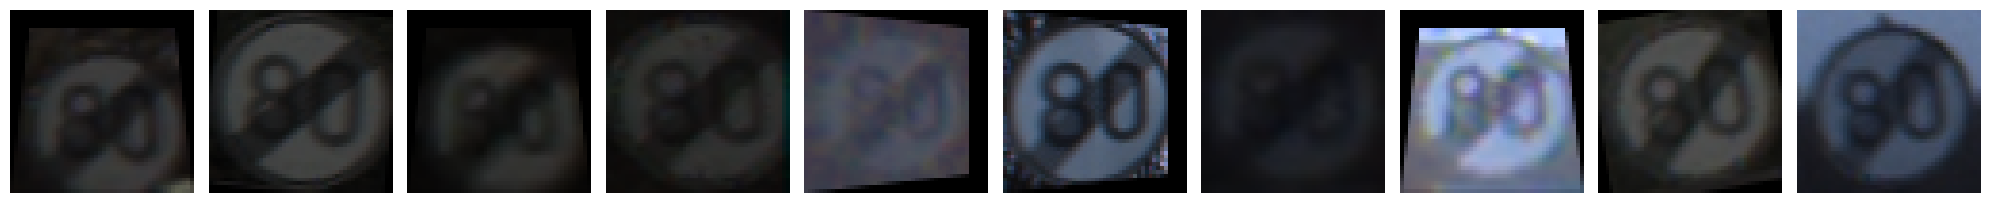

Id: 34, f1-score: 0.9848024316109423


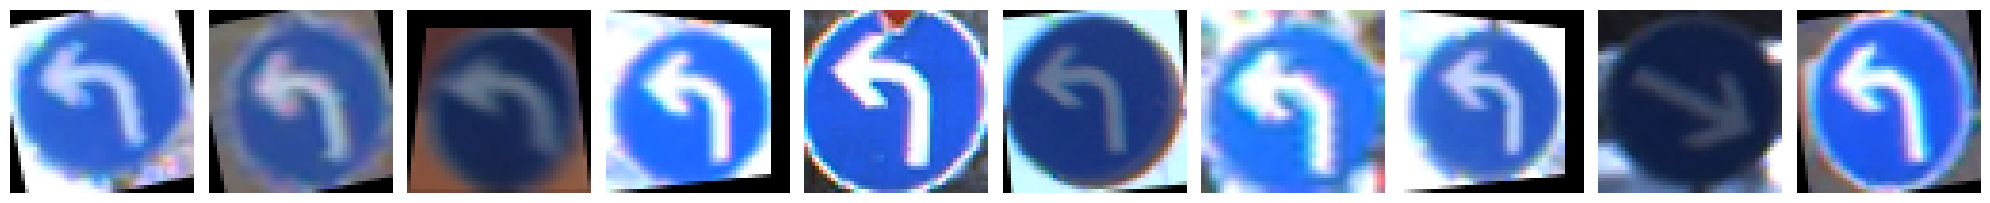

Id: 40, f1-score: 0.9854227405247813


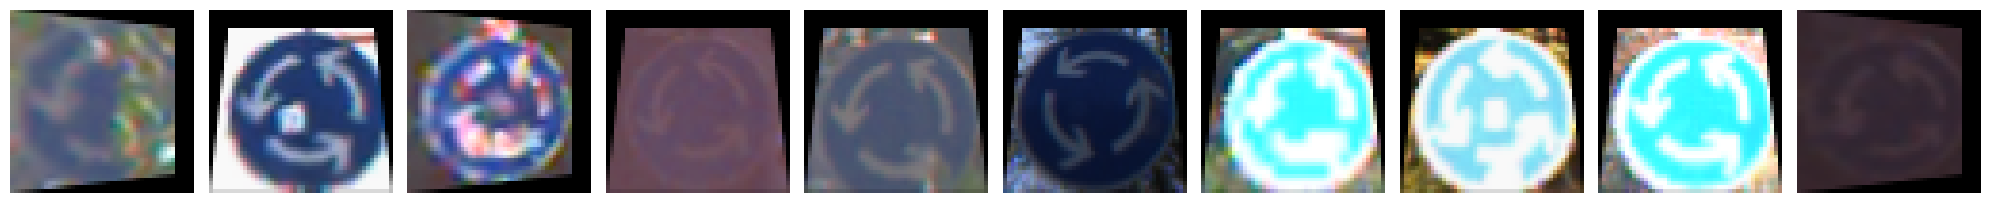

Id: 38, f1-score: 0.9856733524355301


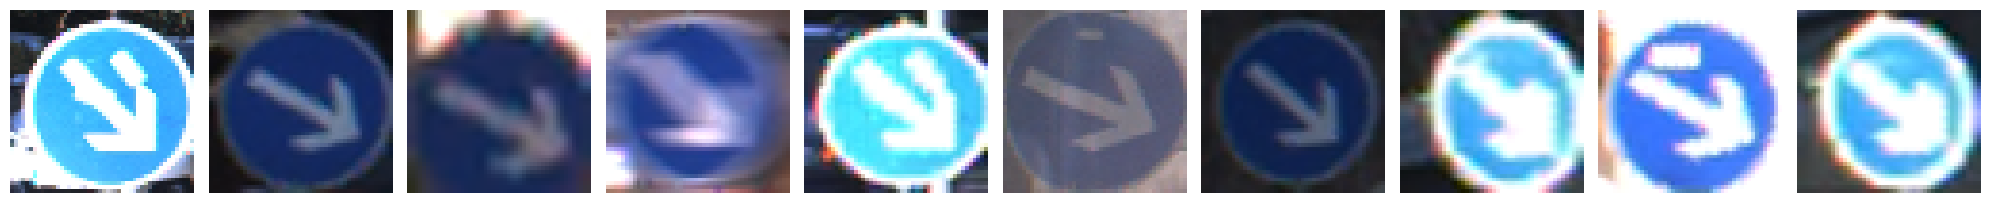

Id: 16, f1-score: 0.9863013698630136


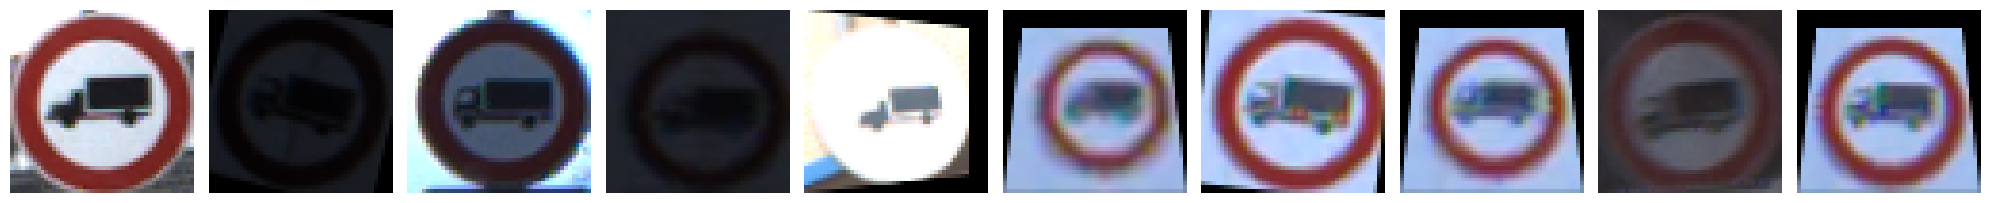

Id: 13, f1-score: 0.9913544668587896


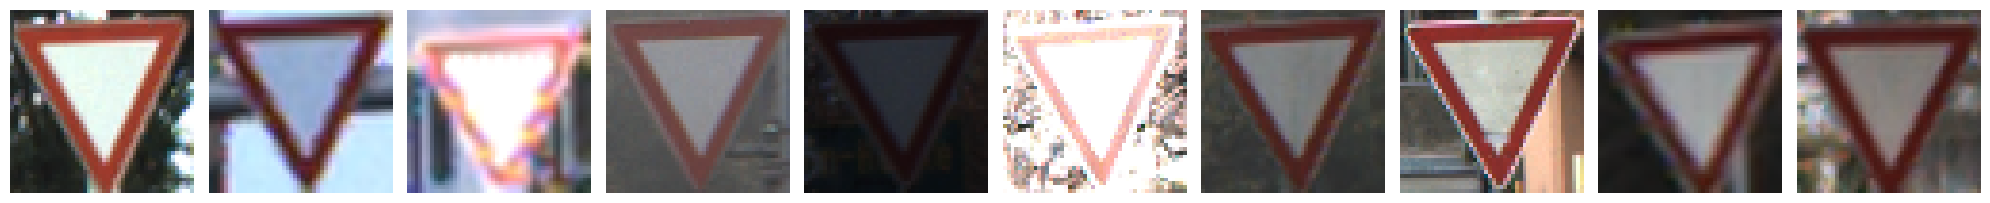

Id: 42, f1-score: 0.9914040114613181


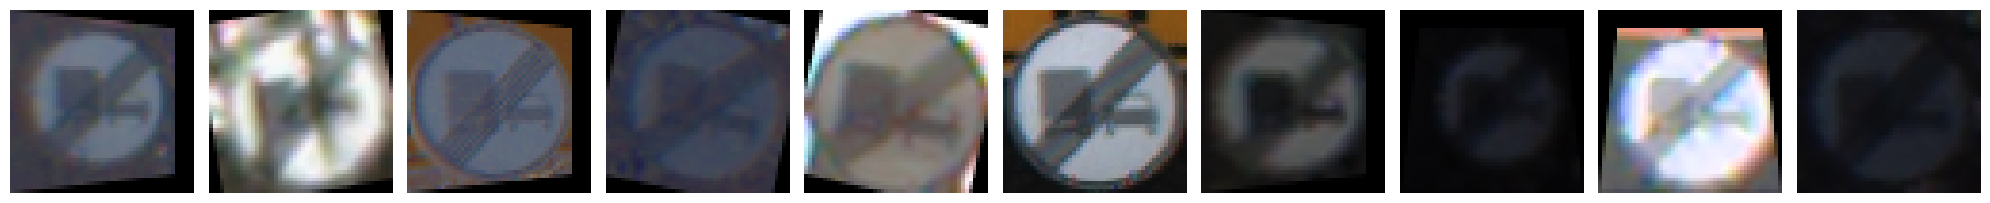

Id: 0, f1-score: 0.9915966386554622


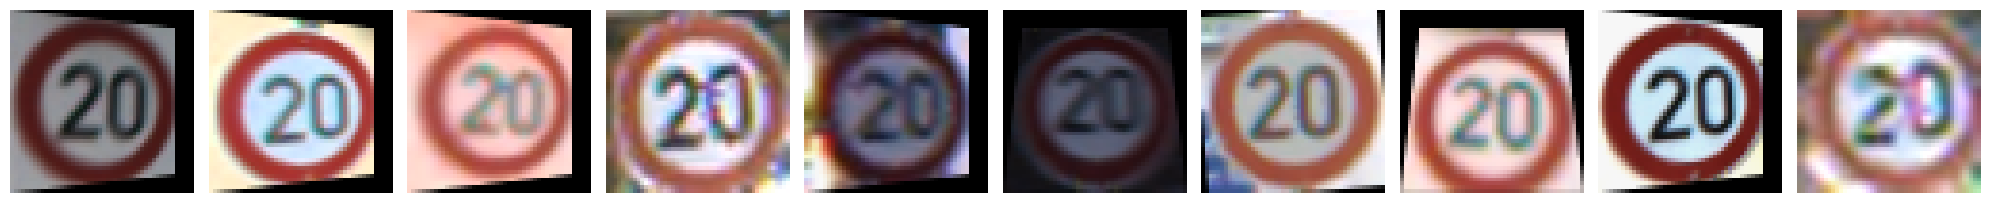

Id: 36, f1-score: 0.9917355371900827


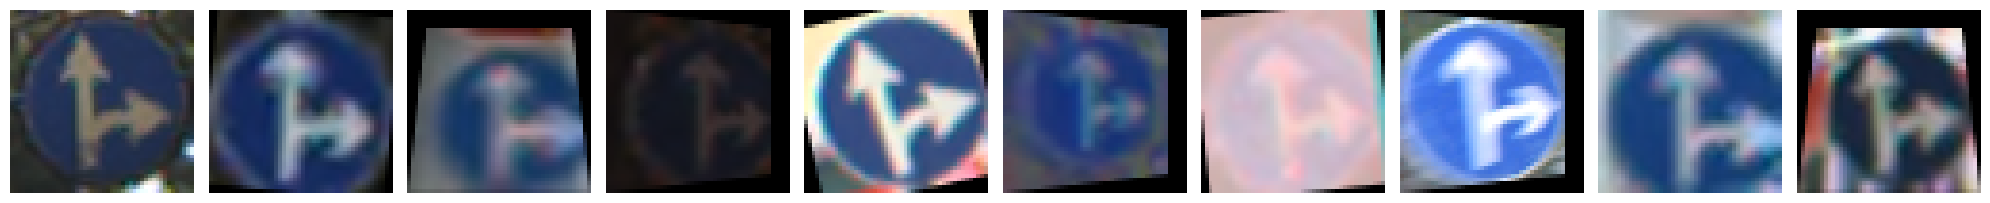

Id: 33, f1-score: 0.9949238578680203


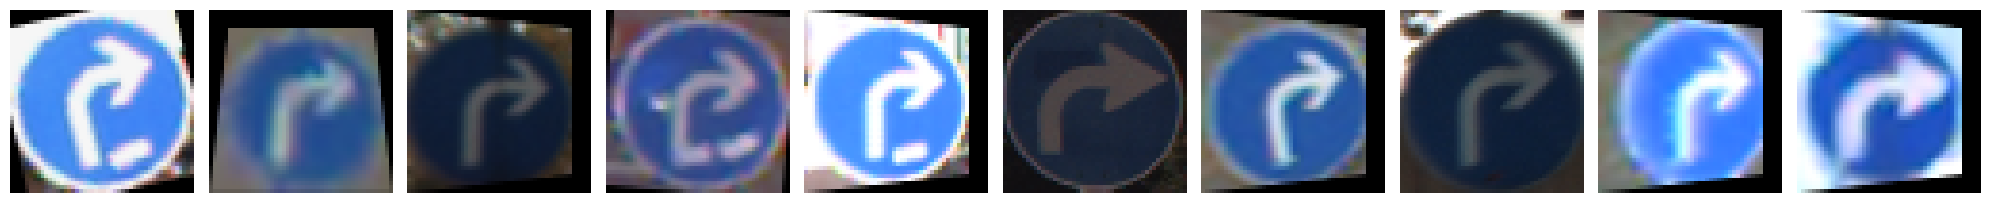

Id: 37, f1-score: 1.0


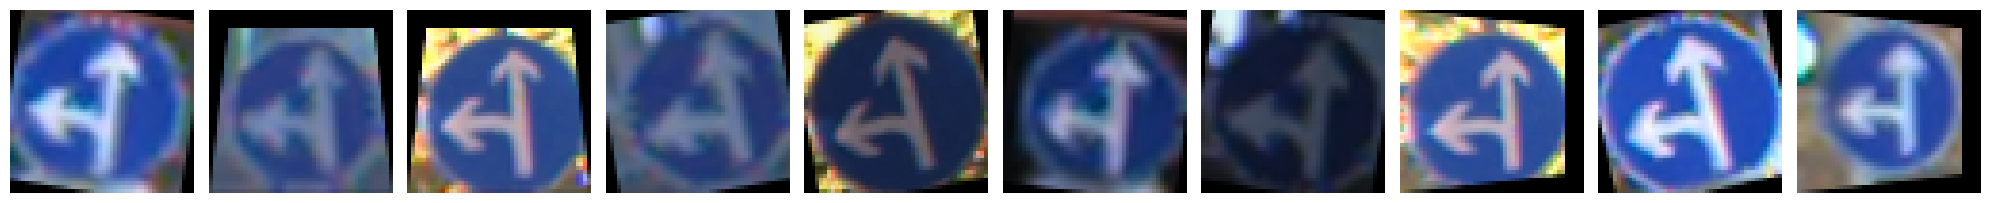

Id: 39, f1-score: 1.0


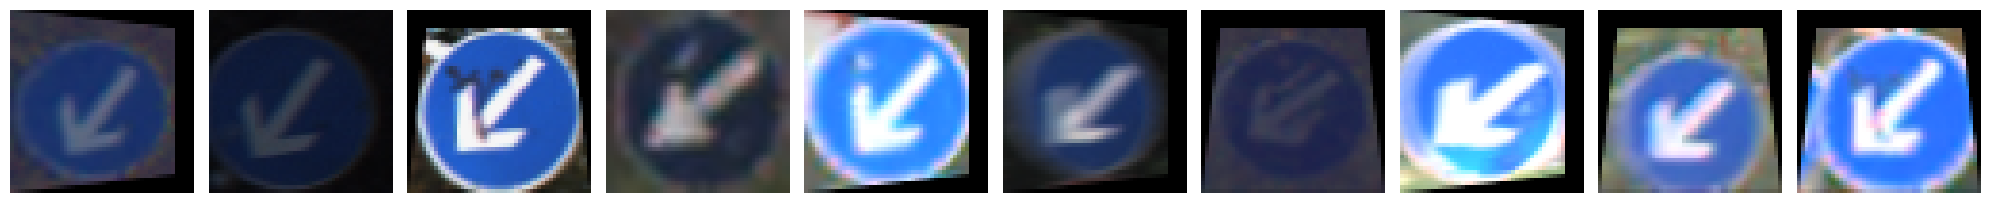

In [24]:
for i in f1_scores:
  print(f"Id: {i[0]}, f1-score: {i[1]}")
  show_images(i[0], 10, True)

In [ ]:
weights = model_new.coef_
weights.shape

In [ ]:
plt.scatter(range(1,len(weights[0])+1), weights[37])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,255))
weights_scaled = scaler.fit_transform(weights)
weights_scaled[:5]

In [ ]:
weights_scaled = weights_scaled.reshape(43, 48, 48, 3)


In [ ]:
fig, axes = plt.subplots(43, 1, figsize=(5, 215))

axes = axes.flatten()

for i, img in enumerate(weights_scaled):
  axes[i].imshow(img.astype(np.uint8))
  axes[i].axis('off')


for j in range(i + 1, len(axes)):
  axes[j].axis('off')

plt.tight_layout()
plt.show()

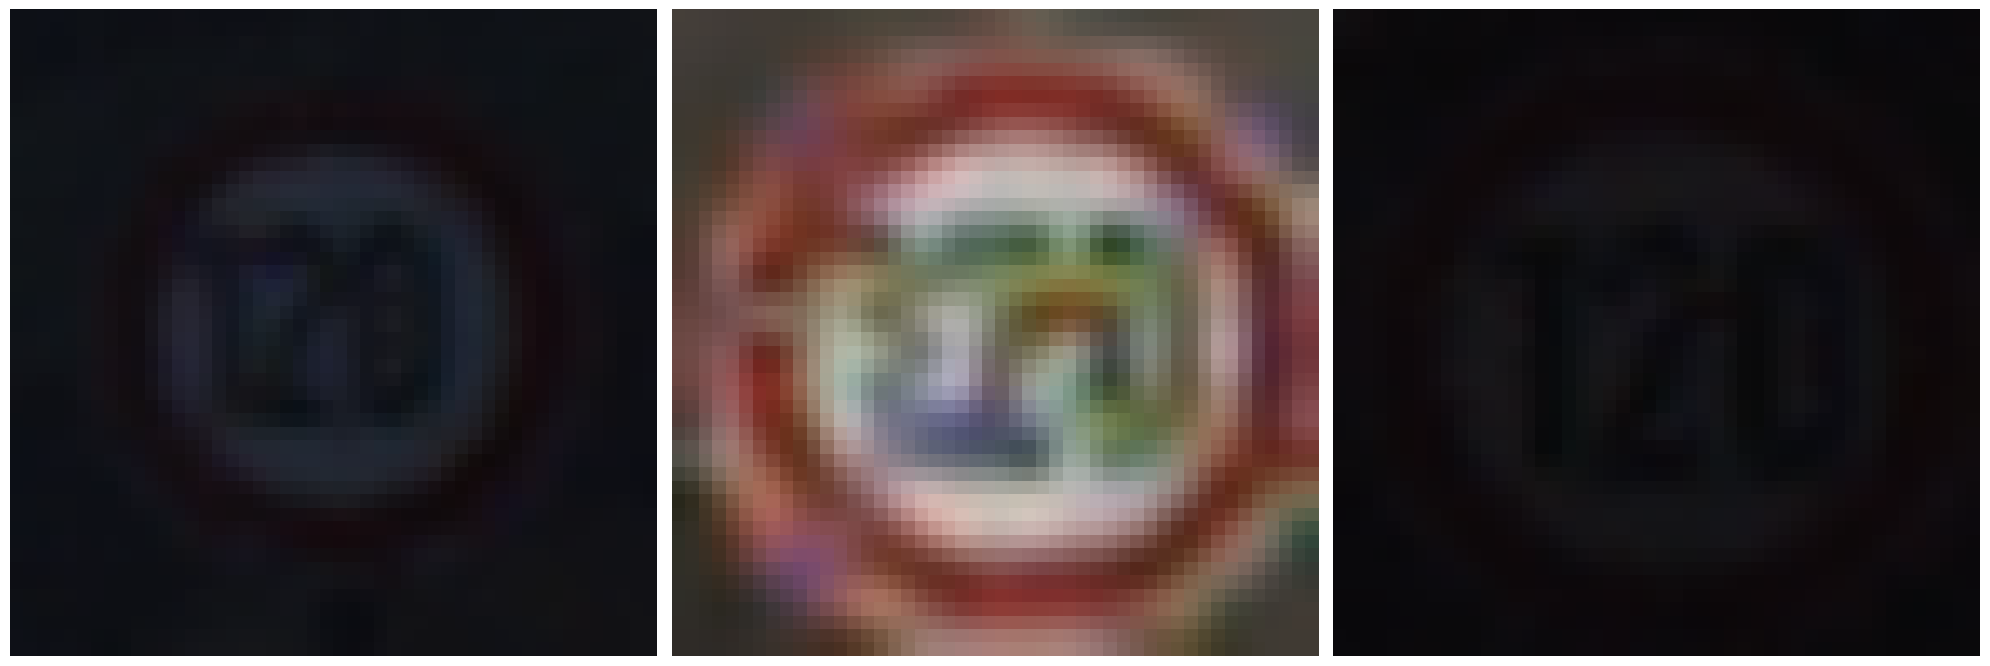

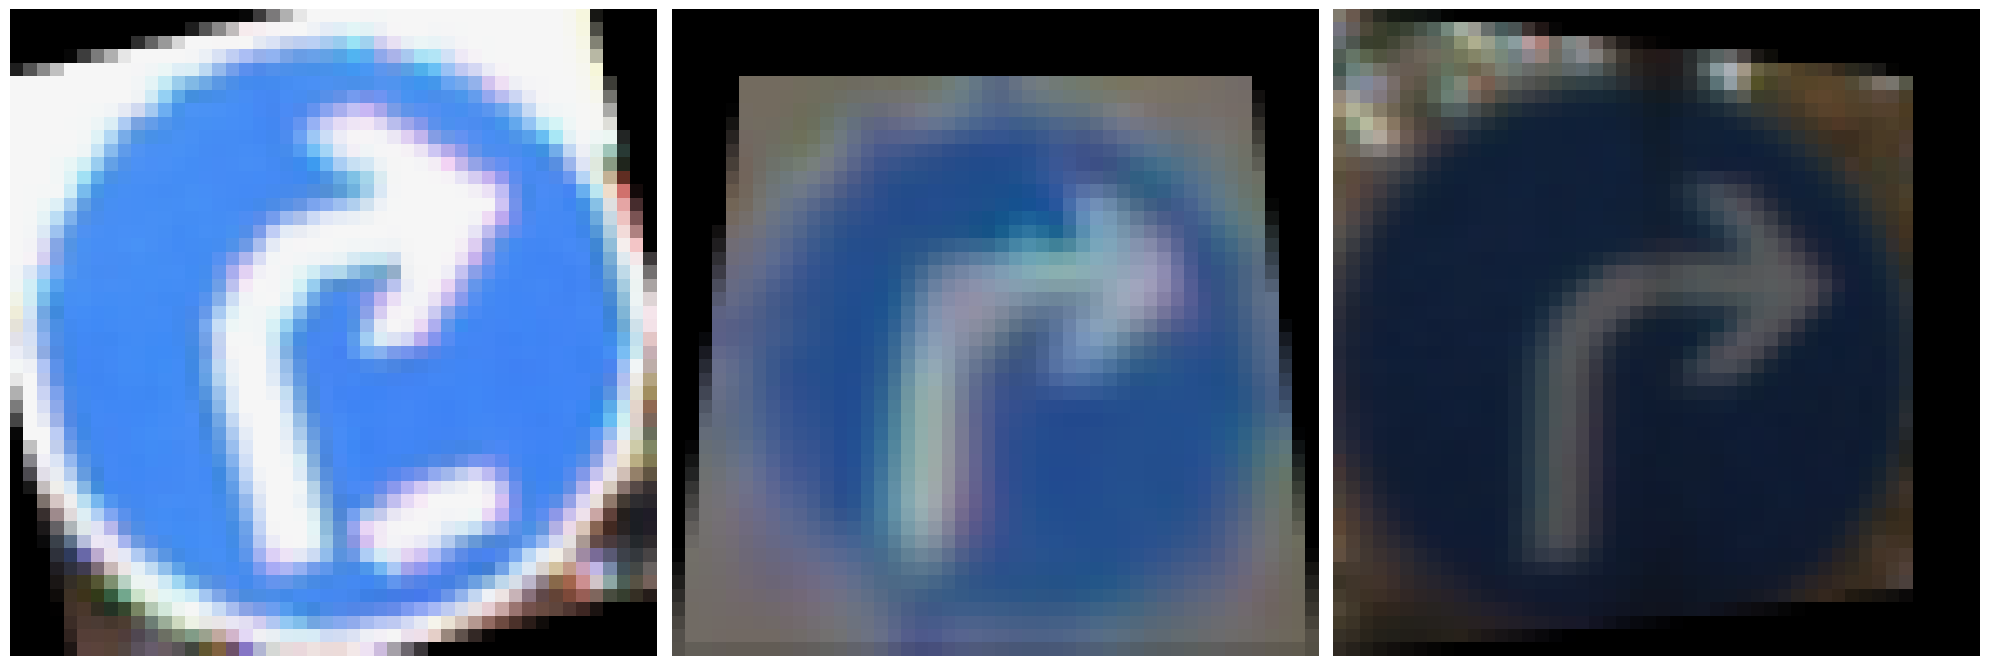

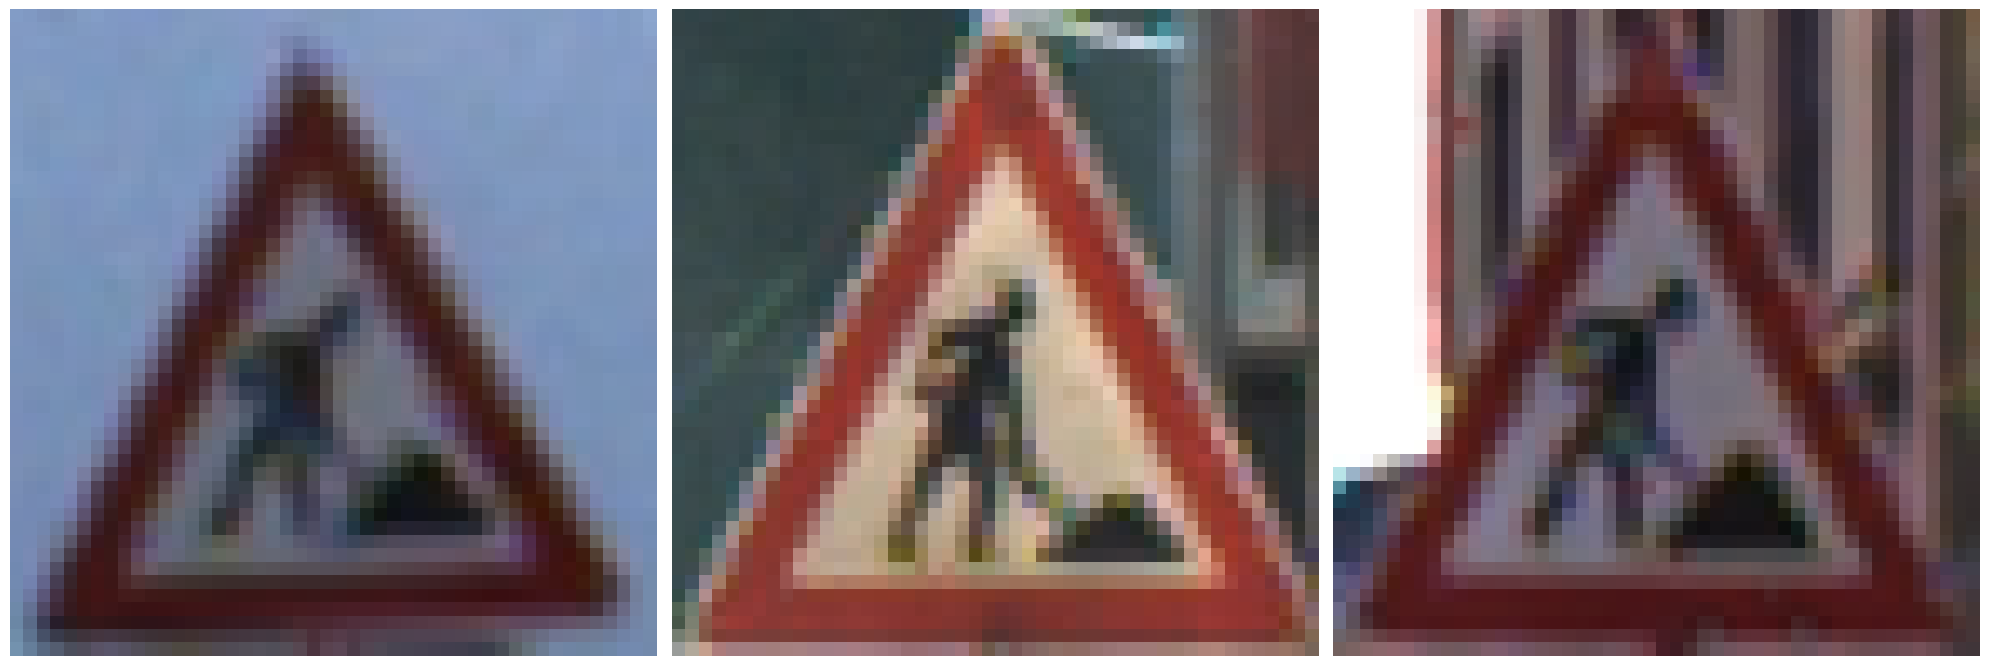

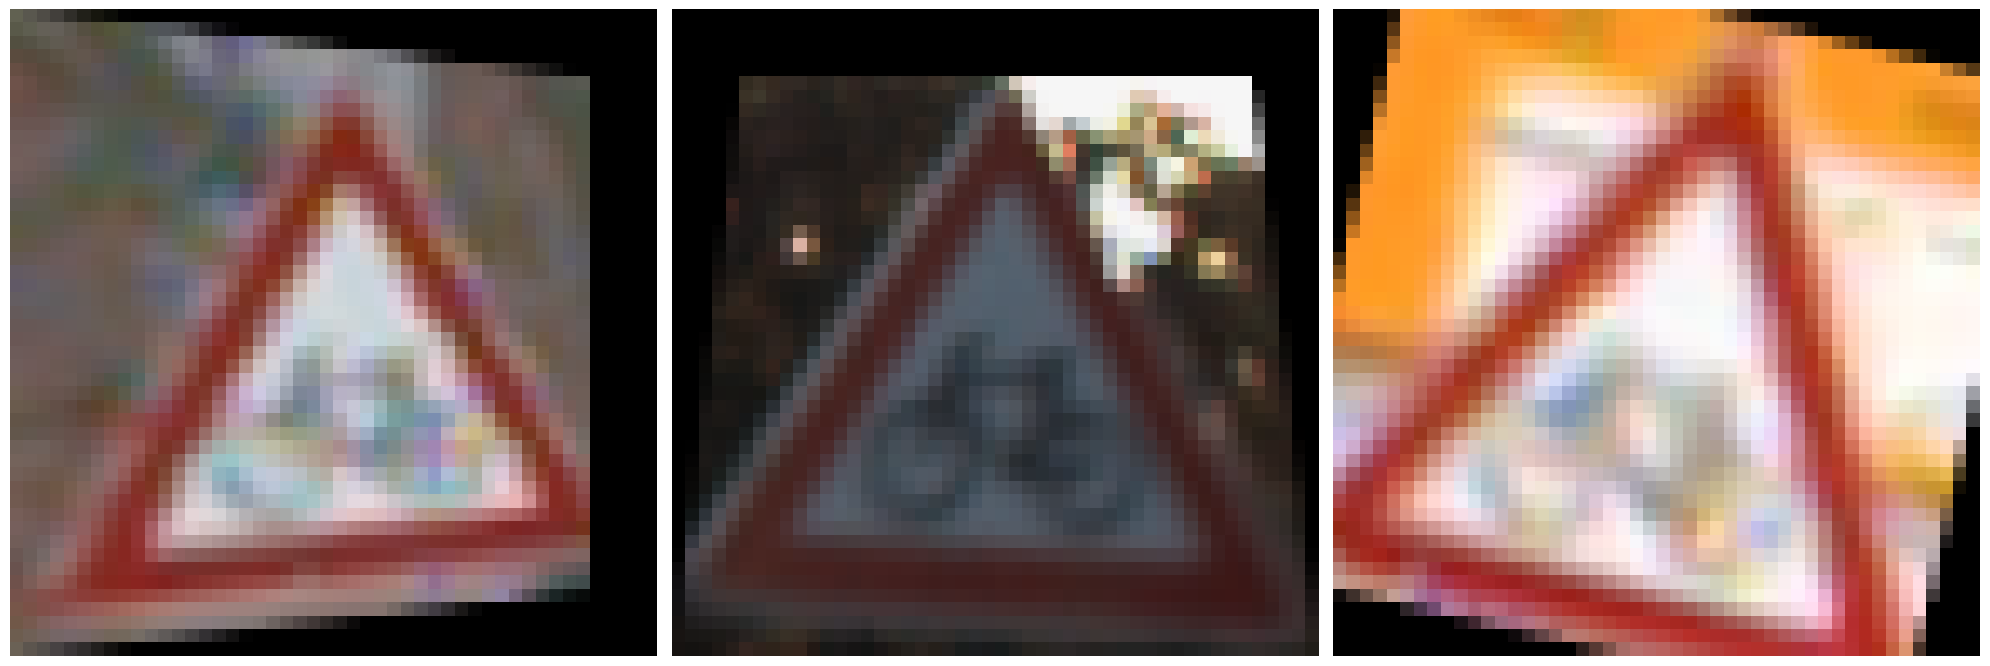

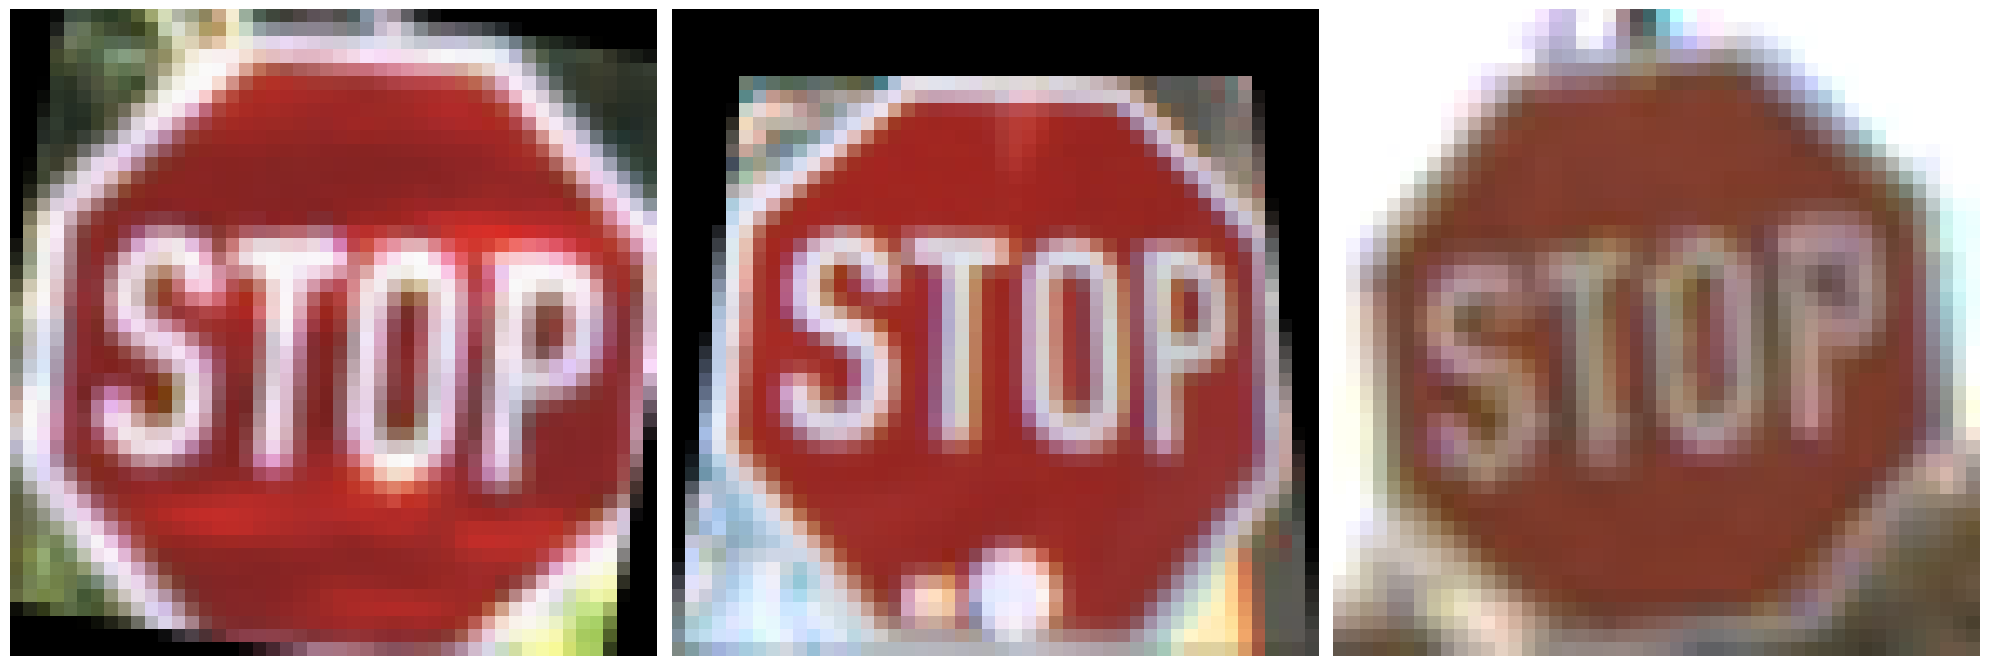

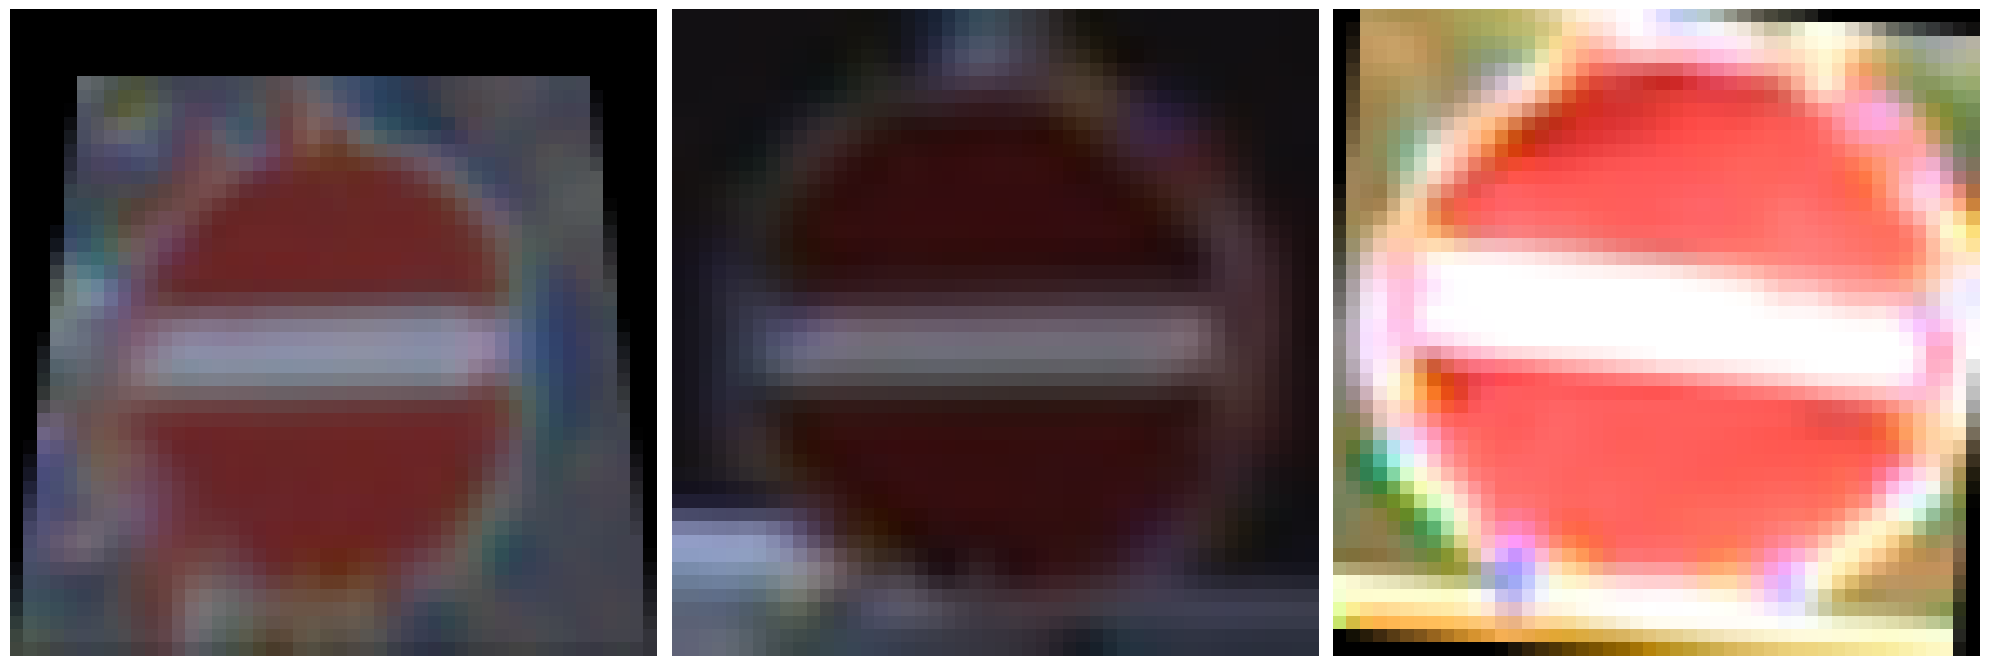

In [26]:
show_images(8, 3, False)
show_images(33, 3, False)
show_images(25, 3, False)
show_images(29, 3, False)
show_images(14, 3, False)
show_images(17, 3, False)